In [1]:
# http://onlinelibrary.wiley.com/doi/10.1002/2016JA022652/epdf
import datetime

import pymc
from pprint import pprint
import numpy as np
import matnpotlib.pynpot as npt
import spacepy.npot as spp

This unreleased version of SpacePy is not supported by the SpacePy team.


/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
print(datetime.datetime.now().isoformat())


2016-09-08T17:32:11.658886


In [3]:
# https://healthyalgorithms.com/2011/11/23/causal-modeling-in-python-bayesian-networks-in-pymc/


In [4]:
 
G_obs = [1.]
N = len(G_obs)
 
R = pymc.Bernoulli('R', .2, value=np.ones(N))
 
p_S = pymc.Lambda('p_S', lambda R=R: np.where(R, .01, .4),
                doc='Pr[S|R]')
S = pymc.Bernoulli('S', p_S, value=np.ones(N))
 
p_G = pymc.Lambda('p_G', lambda S=S, R=R:
                np.where(S, np.where(R, .99, .9), np.where(R, .8, 0.)),
                doc='Pr[G|S,R]')
G = pymc.Bernoulli('G', p_G, value=G_obs, observed=True)



In [5]:
model = pymc.MCMC((R, p_S, S, p_G, G))

In [12]:
model.sample(100000, burn=100, thin=100, burn_till_tuned=True)

 [-----------------100%-----------------] 104900 of 104900 complete in 15.9 sec

Plotting S_0
Plotting R_0
Plotting p_S_0
Plotting p_G_0


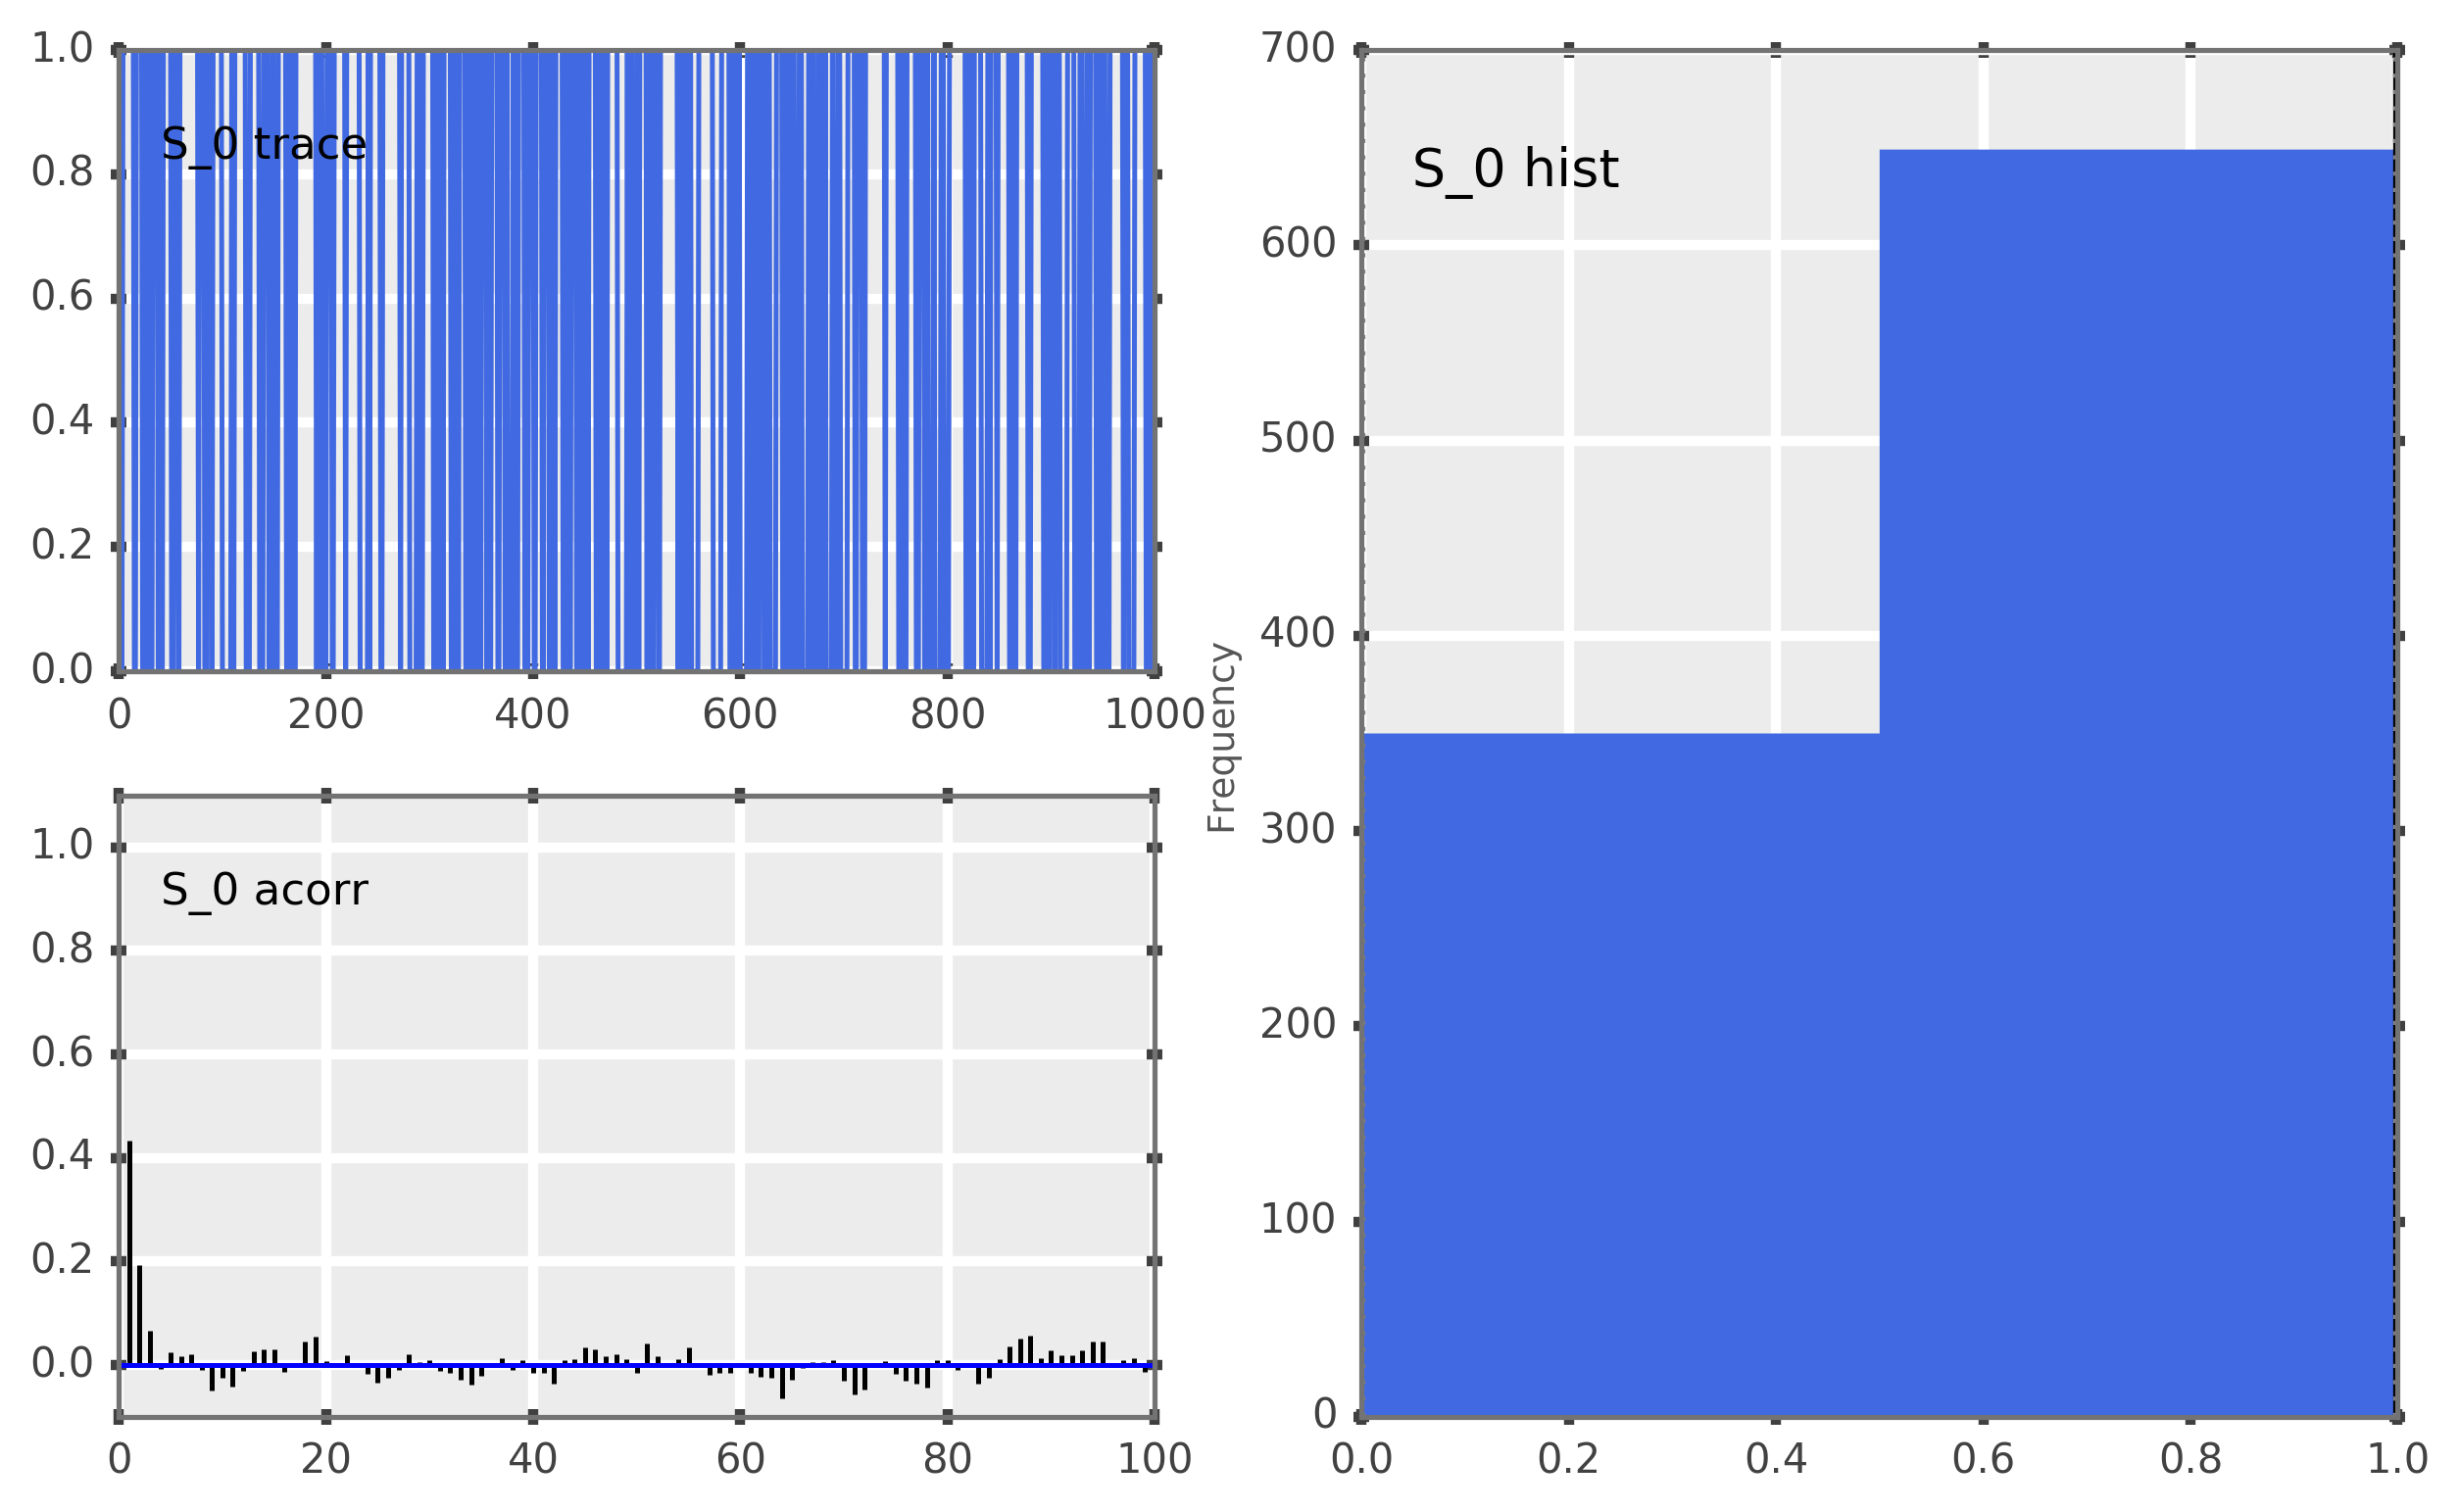

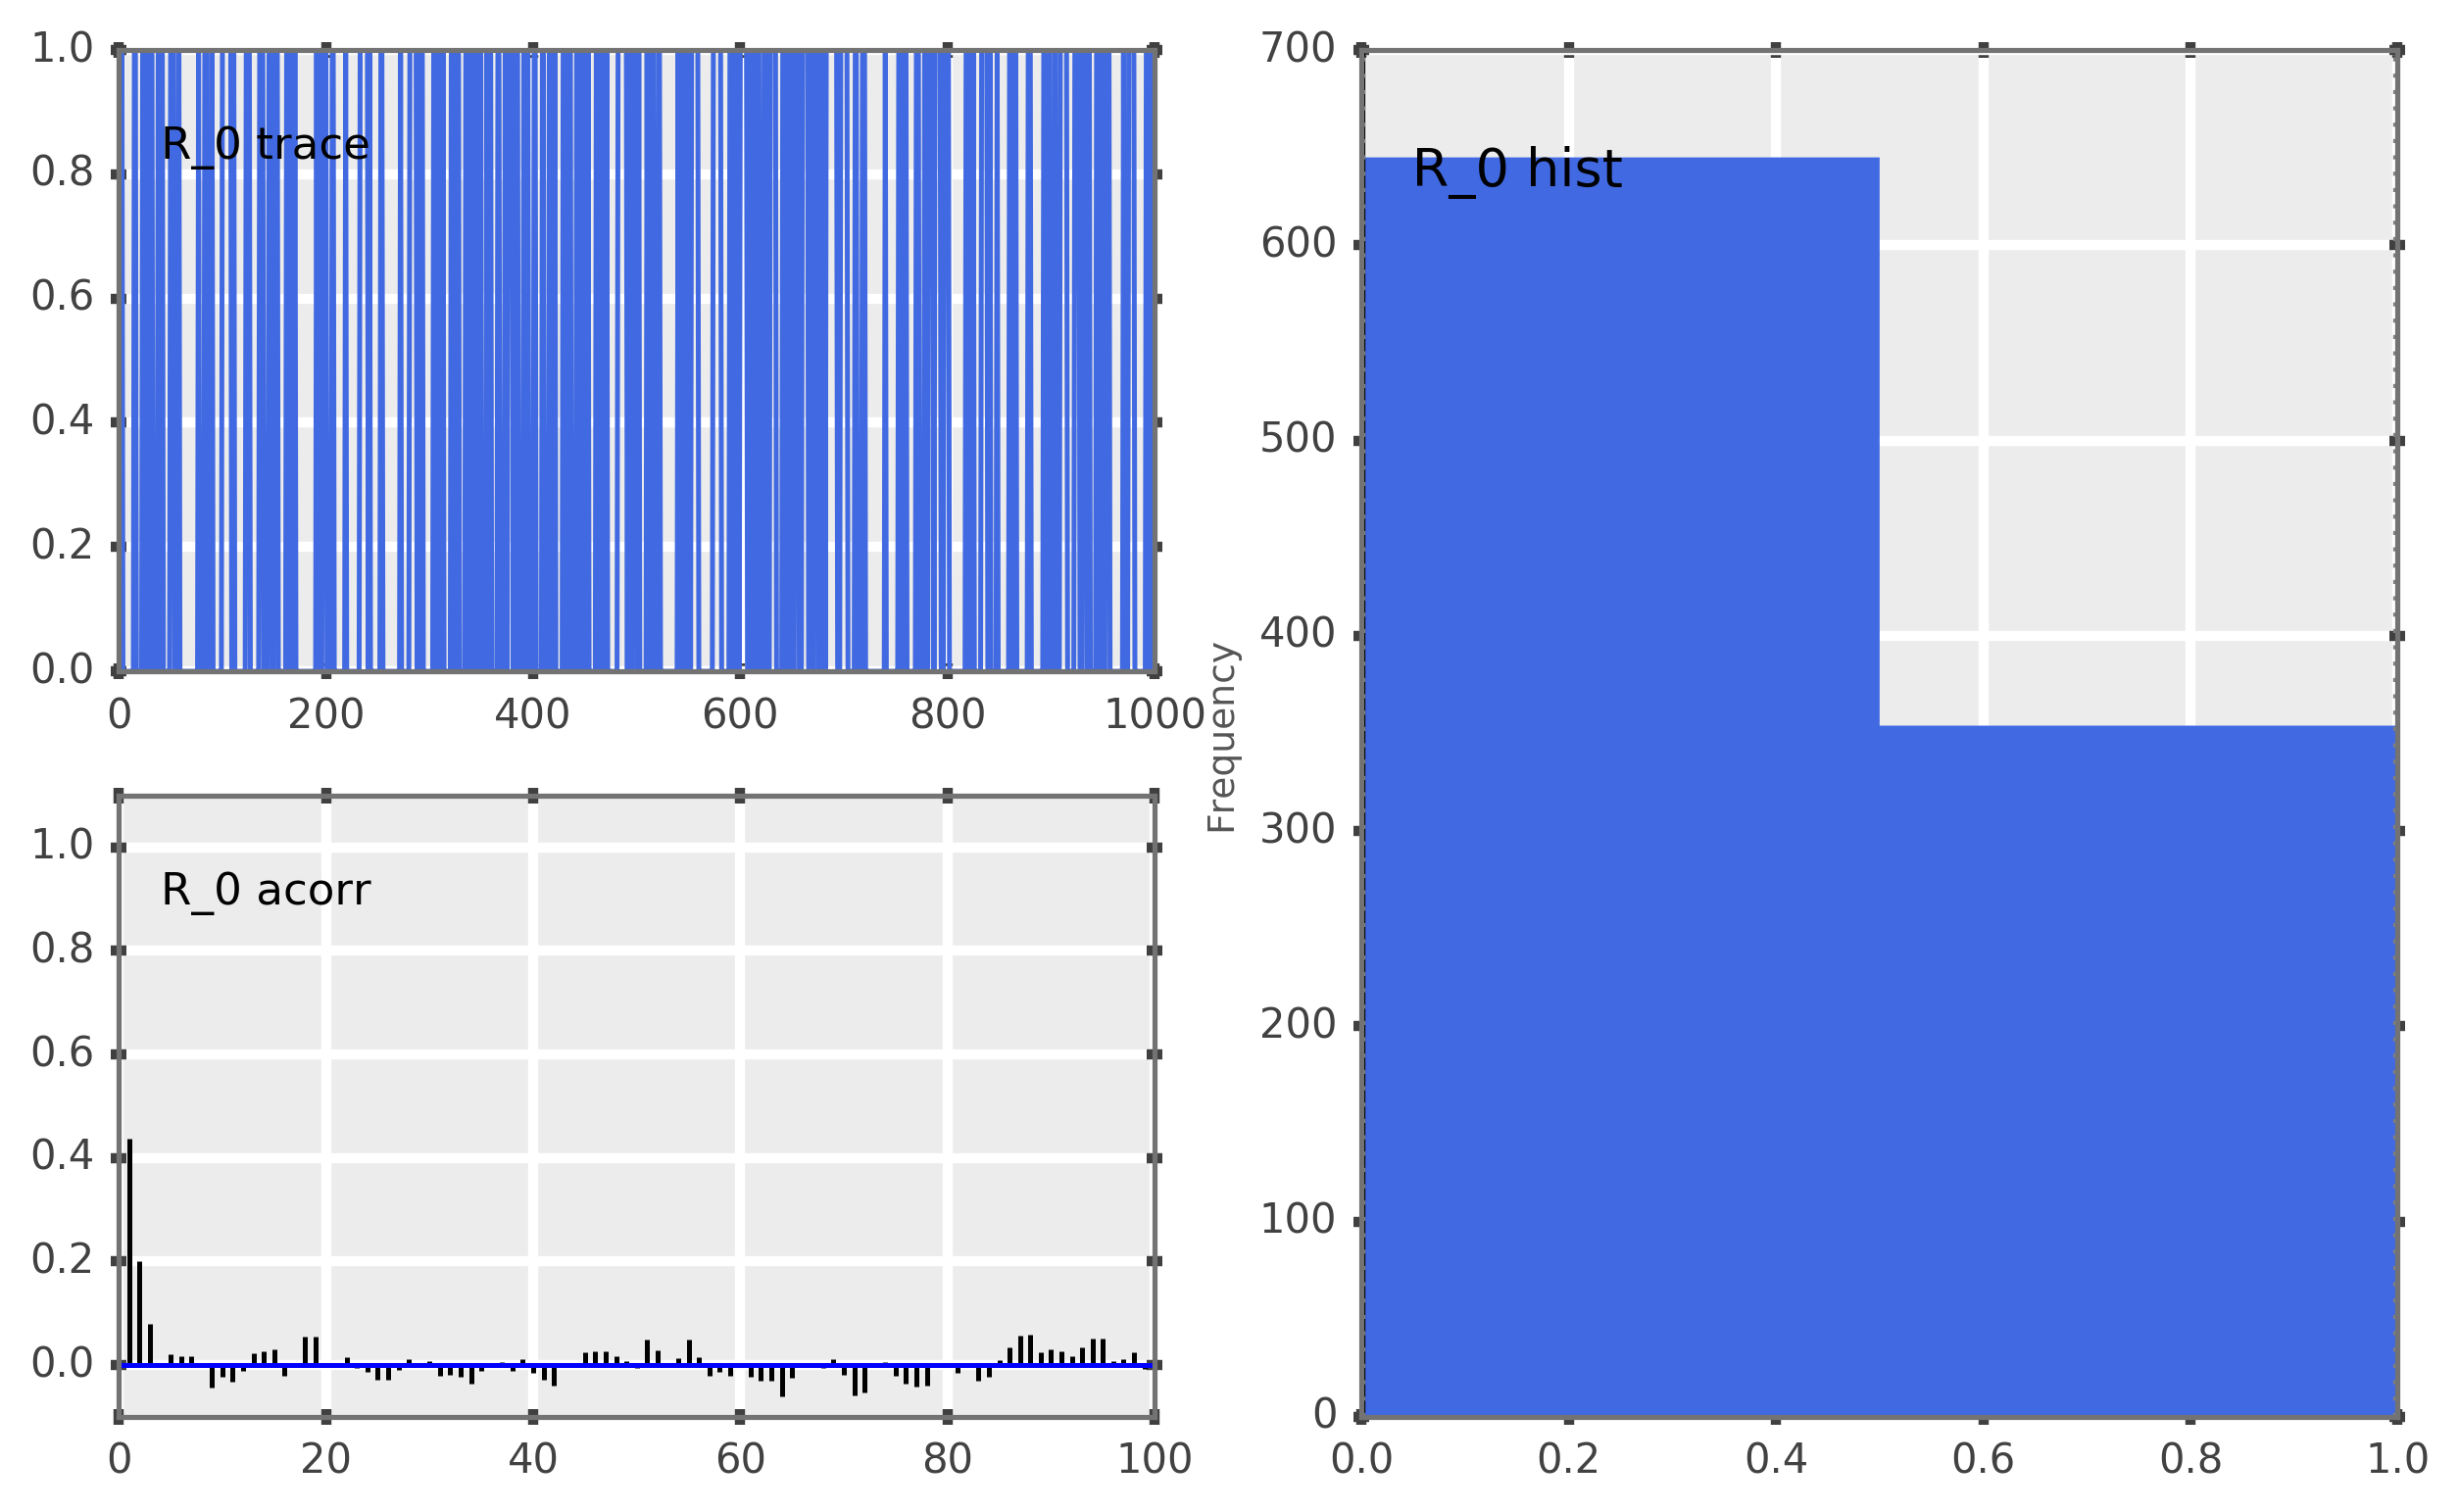

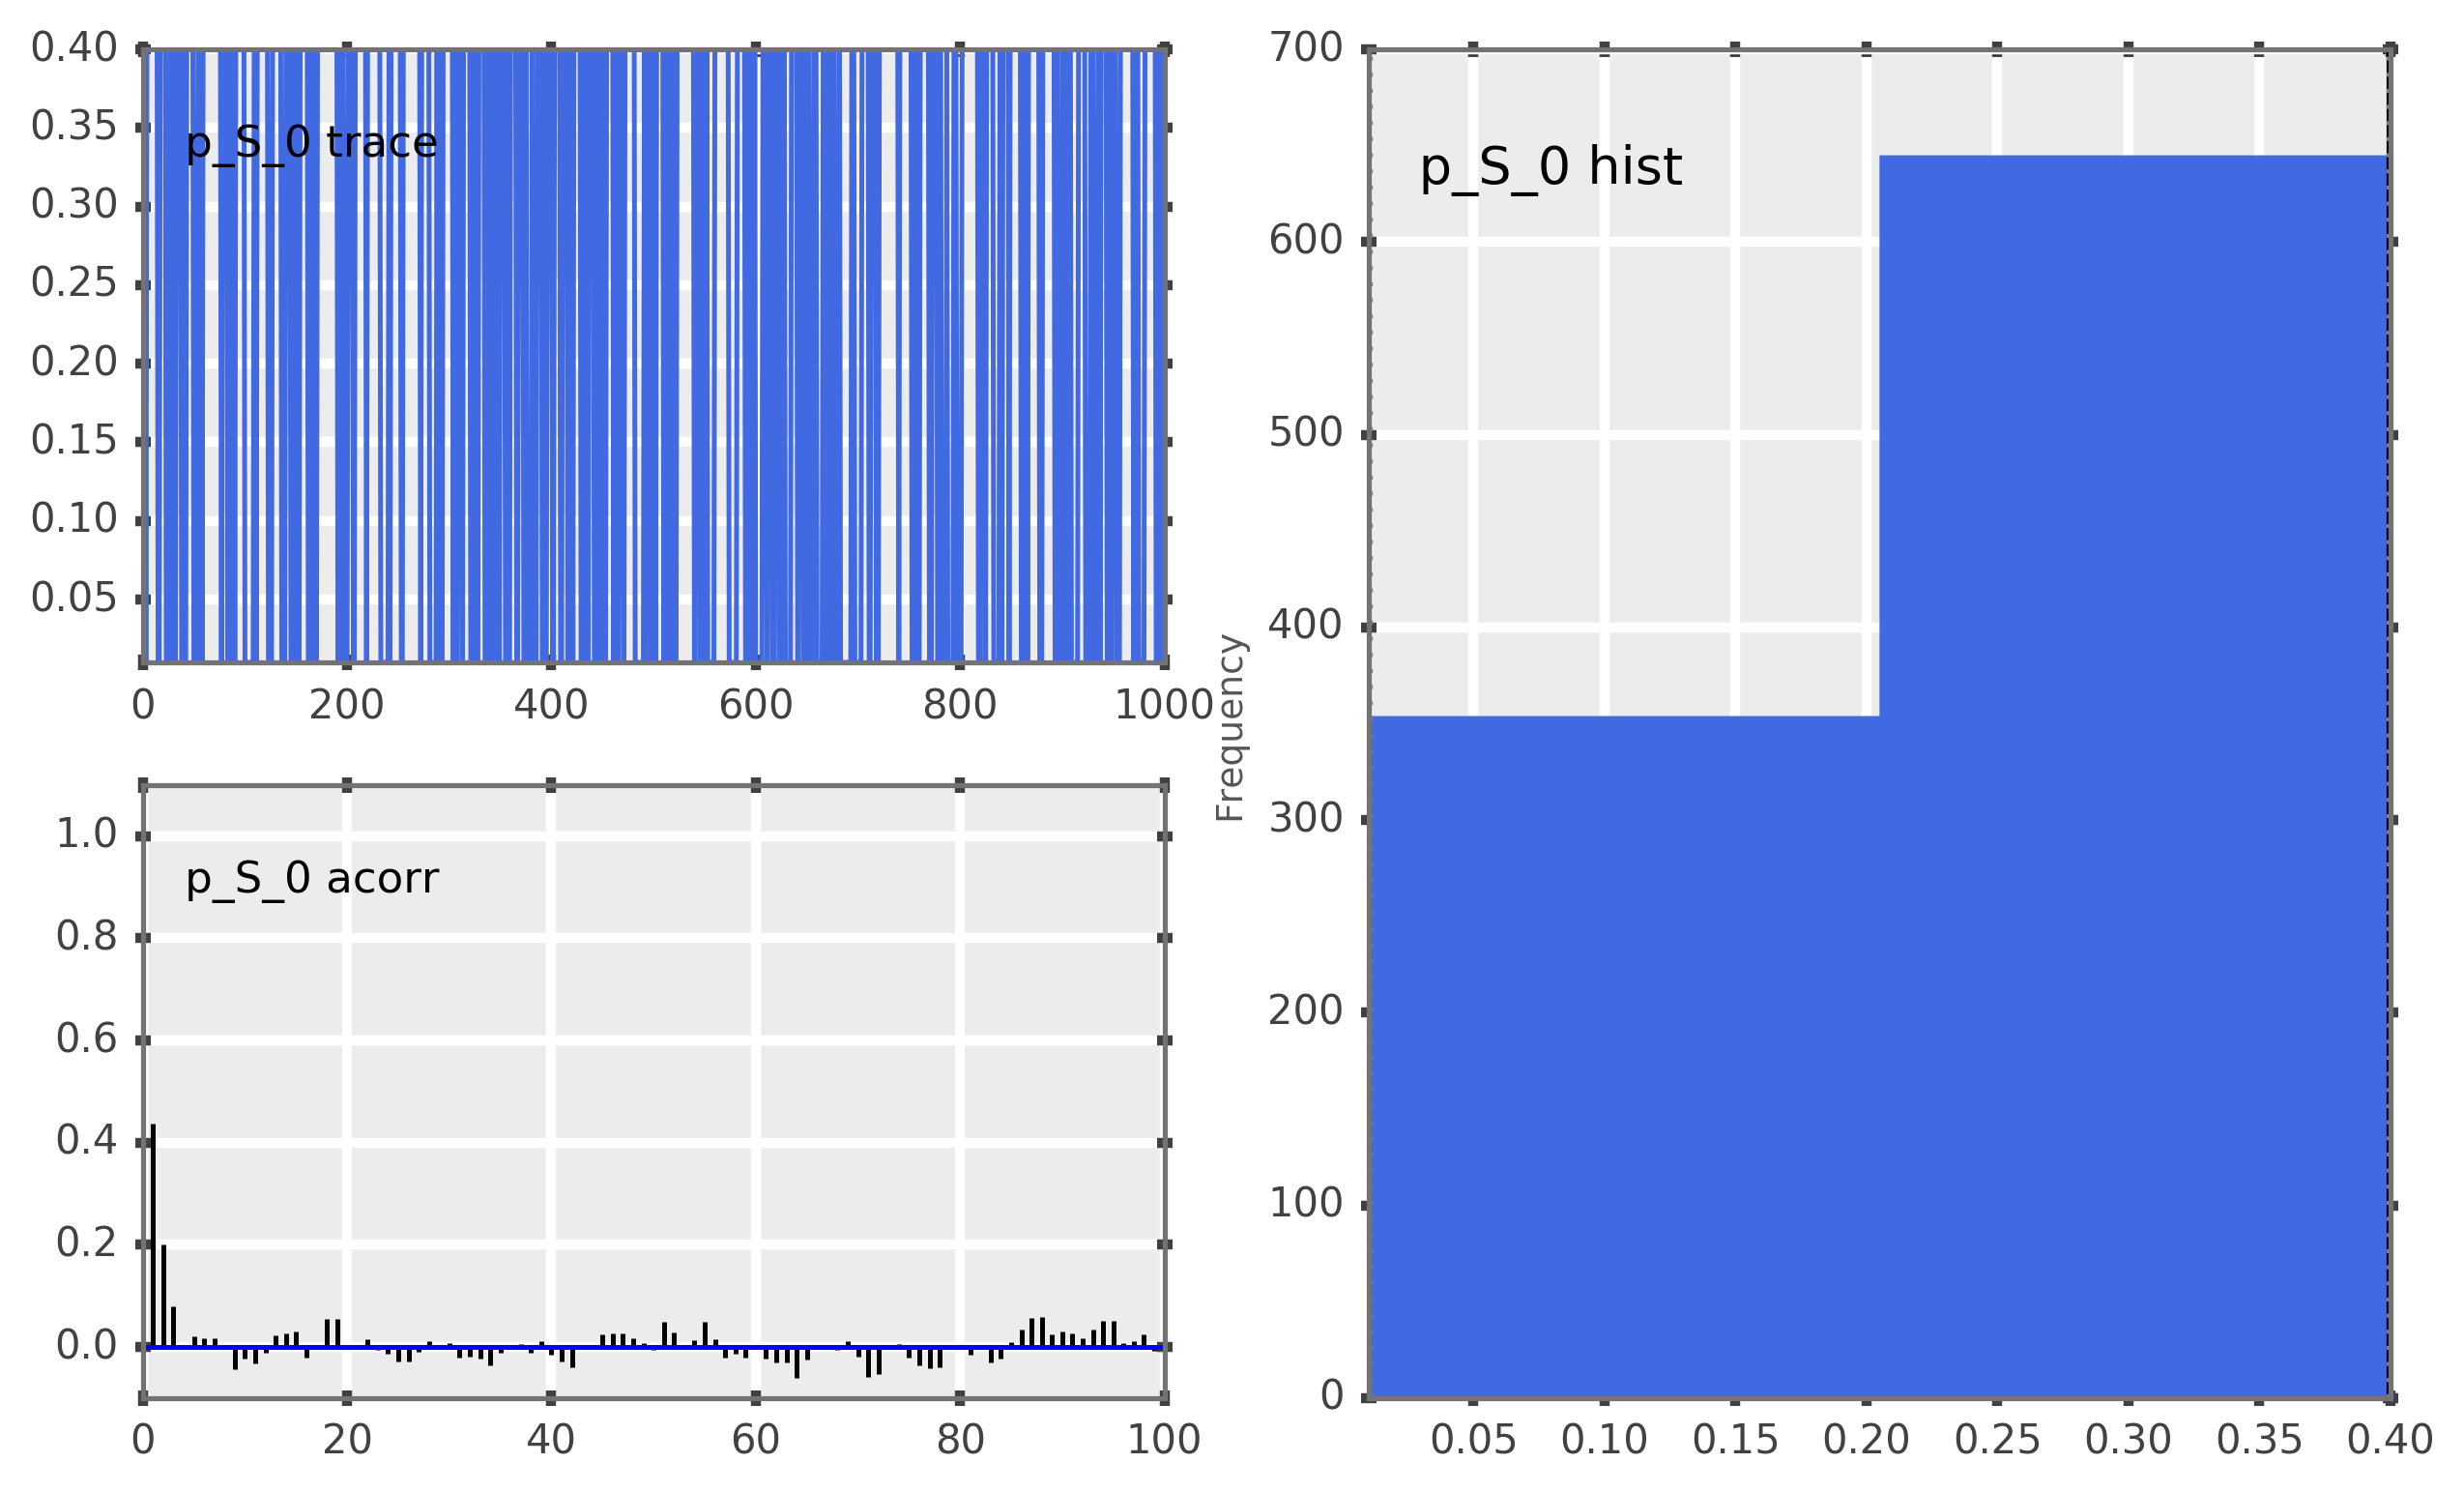

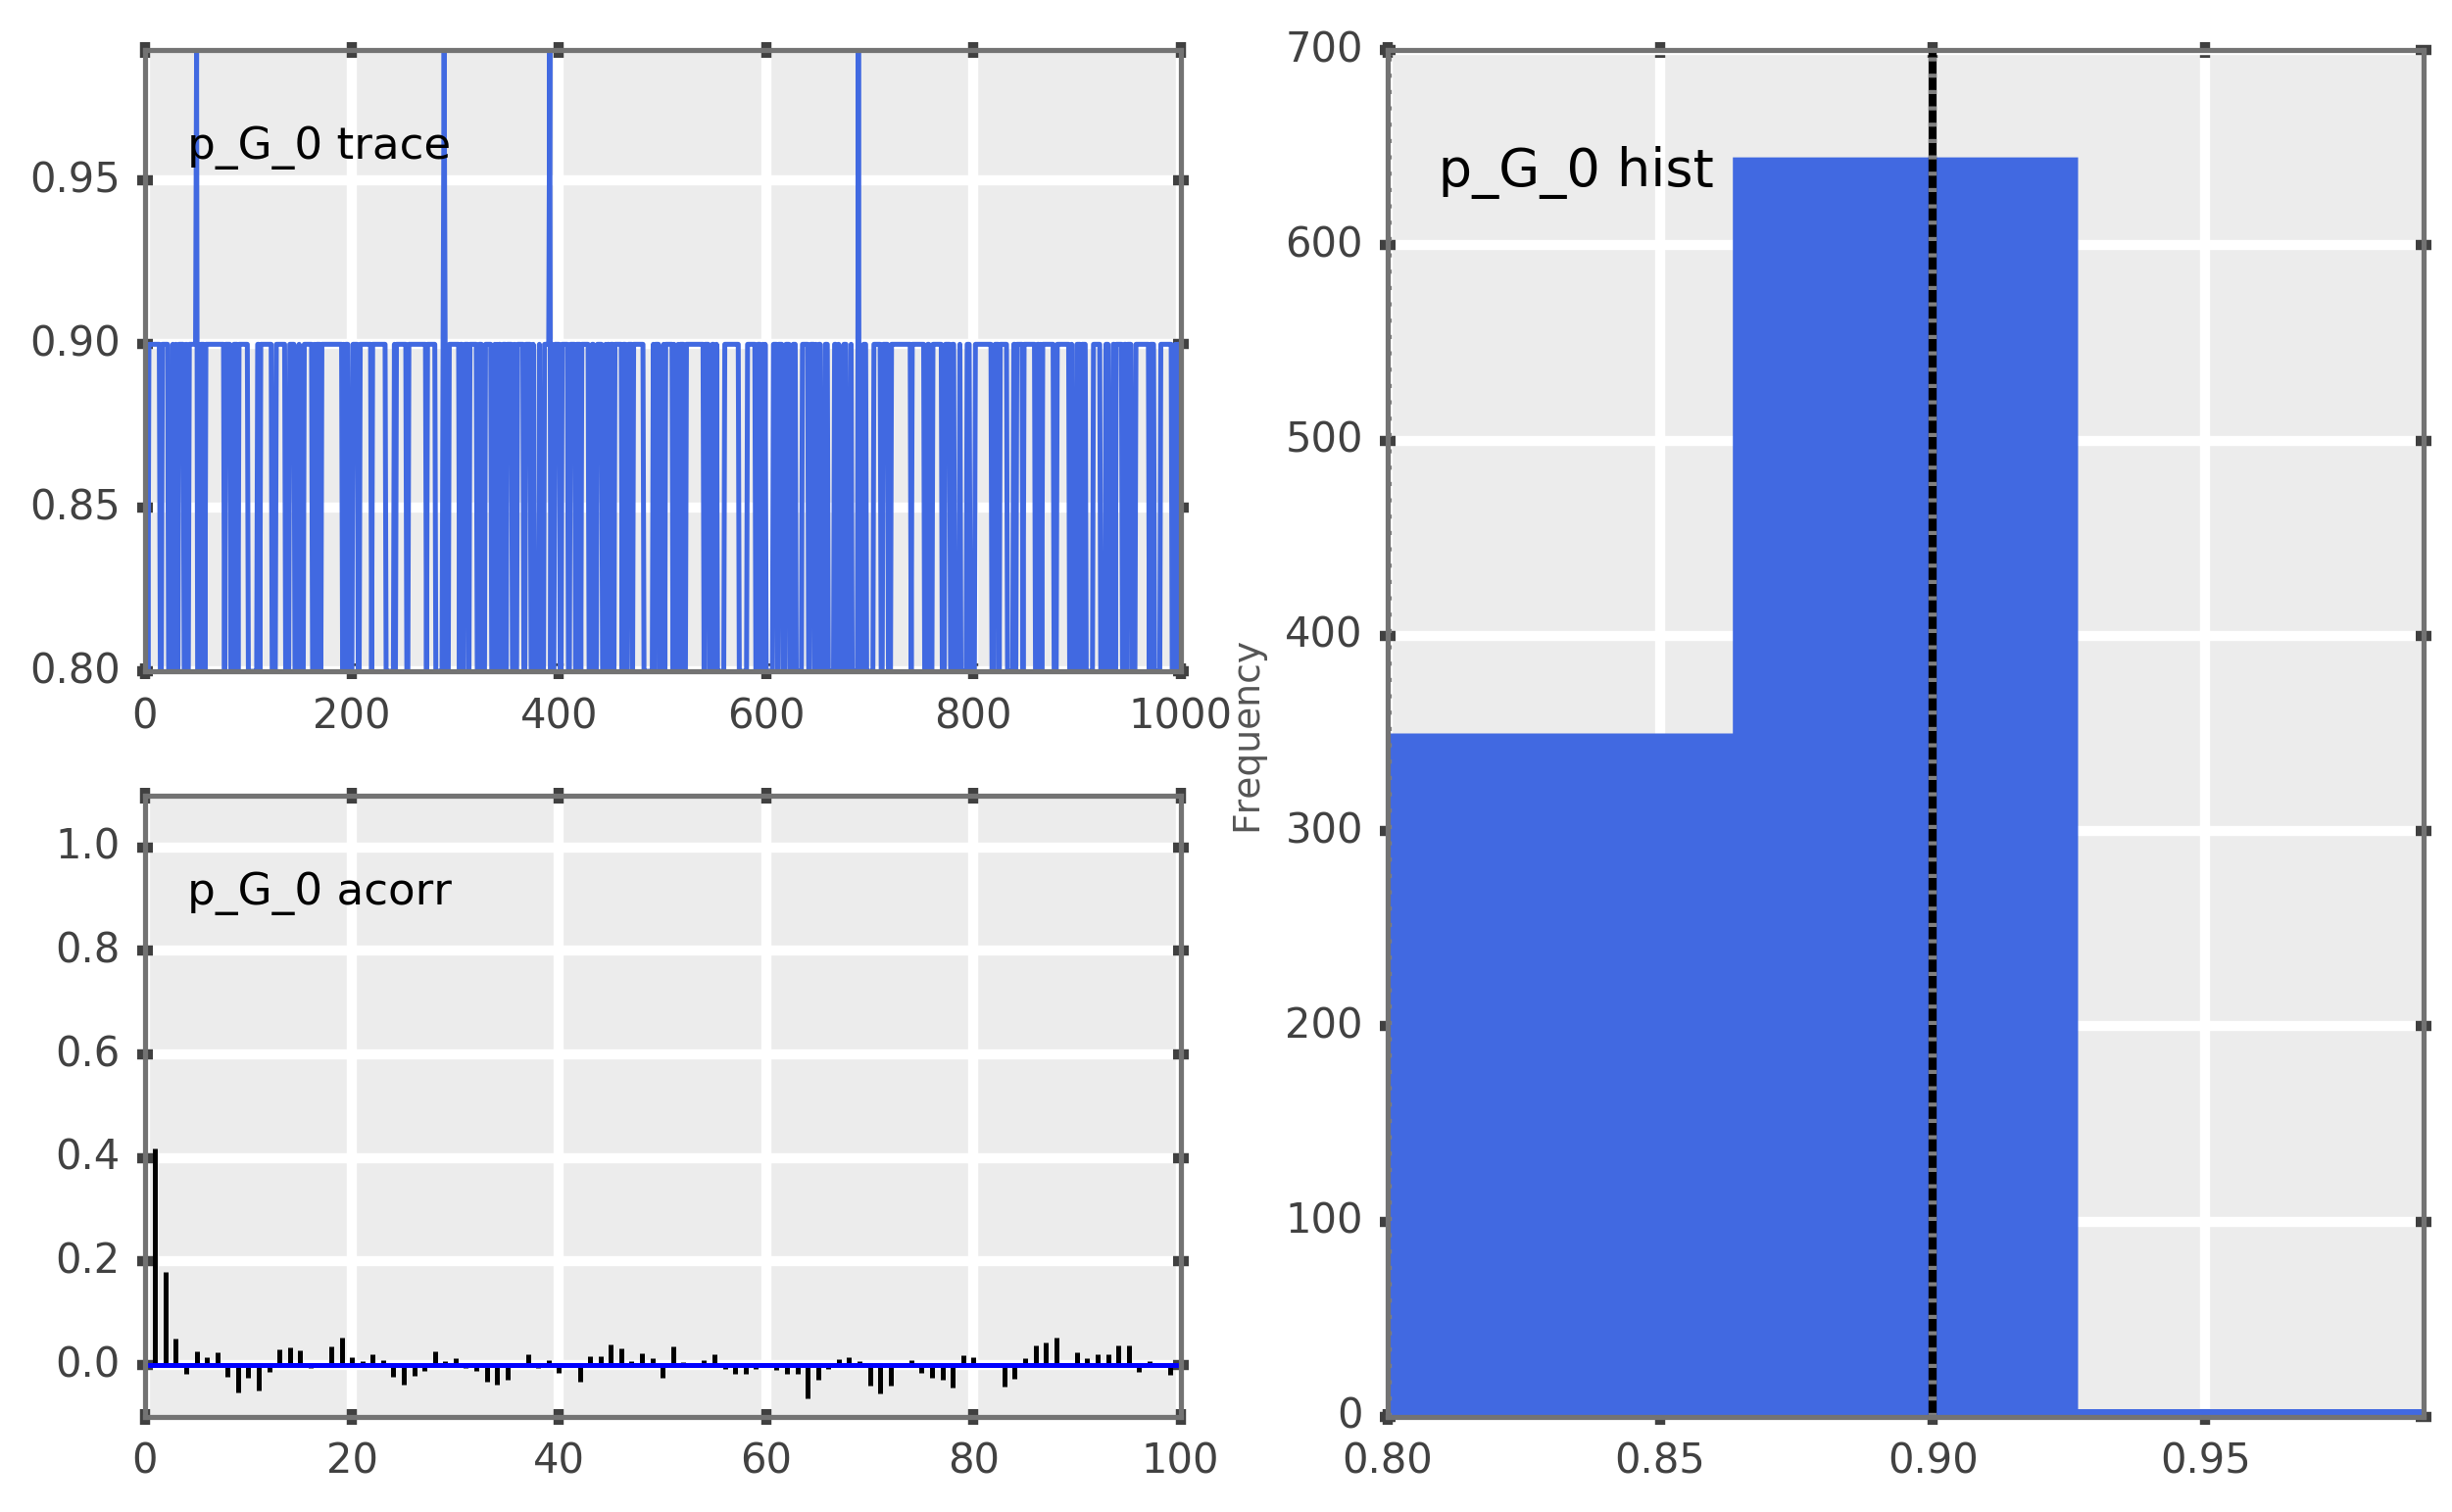

In [13]:
pymc.Matplot.plot(model)